In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
dataset = pd.read_csv("usnews_dataset.csv")
print("Raw data")
# Display first 5 rows
dataset.head(5)

Raw data


,Name,Ranking,usnews.com link,Tuition and Fees,Room and Board,Total Enrollment,School Type,Year Founded,Religiious Affiliation,Academic Calendar,...,Total undergraduate enrollment,Undergraduates who are first generation,Out-of-state students,International students,Registered clubs and organizations,Number of sports,Unnamed: 76,Peer_assessment,First_year_top_ten,Social Mobility rank
0,Williams College,1,https://www.usnews.com/best-colleges/williams-...,"$57,280",14990,2127.0,"Private, Coed",1793.0,None,04-01-04,...,2073.0,22%,86%,7.80%,154.0,17.0,NaN,4.7,89%,90.0
1,Amherst College,2,https://www.usnews.com/best-colleges/amherst-c...,"$58,640",15310,1855.0,"Private, Coed",1821.0,None,Semester,...,1855.0,21%,87%,8.10%,177.0,12.0,NaN,4.6,88%,99.0
2,Swarthmore College,3,https://www.usnews.com/best-colleges/swarthmor...,"$54,656",16088,1559.0,"Private, Coed",1864.0,None,Semester,...,1559.0,27%,87%,13.20%,154.0,8.0,NaN,4.6,90%,148.0
3,Wellesley College,3,https://www.usnews.com/best-colleges/wellesley...,"$56,052",17096,2534.0,"Private, Women's college",1870.0,None,Semester,...,2534.0,17%,86%,13.60%,153.0,8.0,NaN,4.5,83%,113.0
4,Pomona College,5,https://www.usnews.com/best-colleges/pomona-co...,"$54,762",17218,1679.0,"Private, Coed",1887.0,None,Semester,...,1679.0,30%,74%,11.40%,227.0,9.0,NaN,4.5,91%,113.0


In [43]:
def filter_dataset(dataset, category):
    usnews = dataset[category]
    # Drop rows which contains N/A values
    return usnews

def format_endowment(s):
    s = s.replace(',','').split('.')[0]
    return float(s[1:])
    
def format_retention(s):
    return int(s[:-1])/100

def clean_data(usnews):
    usnews['Freshmen_retention'] = usnews['Freshmen_retention'].apply(format_retention)
    return usnews

**Task 1**

Group various ranking index into group of 10, then calculated average retention rate for each index in each group. 
Plot the result in group bar graph

There are 5 rankings that have more than 50 entries
- National Liberal Arts Colleges
- Best Undergraduate Teaching
- Best Value Schools
- Most Innovative Schools
- Top Performers on Social Mobility

In [12]:
def freshmen_retention_across_rankings(dataset):
    category = ['Name', \
                      
            'National Liberal Arts Colleges', \
            'Best Undergraduate Teaching', \
            'Best Value Schools', \
            'Most Innovative Schools', \
            'Top Performers on Social Mobility', \
            'First-Year Experiences', \
            'Learning Communities', \
            'Senior Capstone', \
            'Writing in the Disciplines', \
            'Study Abroad', \
            'Undergraduate Research/Creative Projects', \

            'Freshmen_retention', \
          ]
    usnews = filter_dataset(dataset, category)
    usnews = clean_data(usnews)
    # usnews.info() shows rankings that have too few entries
    # filter
    category = ['Name', \
            
            'National Liberal Arts Colleges', \
            'Best Undergraduate Teaching', \
            'Best Value Schools', \
            'Most Innovative Schools', \
            'Top Performers on Social Mobility', \

            'Freshmen_retention', \
          ]
    
    labels = ['1->10', '11->20', '21->30', '31->40', '41->50', '51->60', '61->70', '71->80', '81->90', '91->100', '>100']
    ranking = []
    best_teaching = []
    best_values = []
    most_innovative = []
    social_mobility = []

    dictionary = {category[1] : ranking,
                  category[2] : best_teaching,
                  category[3] : best_values,
                  category[4] : most_innovative,
                  category[5] : social_mobility}
    
    for cate in category[1:-1]:
        for i in range(1,101,10):
            dictionary[cate].append(round(usnews[(usnews[cate] >= i) & (usnews[cate] <= i+9)] \
                                 ['Freshmen_retention'].mean(),2))
        dictionary[cate].append(round(usnews[(usnews[cate] > 100)]['Freshmen_retention'].mean(),2))
        
    # Plot bar graph
    figure = plt.Figure(figsize = (30,200))
    df = pd.DataFrame({ 'National Liberal Arts Colleges' : ranking,
                        'Best Undergraduate Teaching' : best_teaching, 
                        'Best Value Schools' : best_values,
                        'Most Innovative Schools' :  most_innovative,
                        'Top Performers on Social Mobility' : social_mobility}, 
                     index = labels)
    ax = df.plot.bar(rot = 0, figsize = (30,10), fontsize =20, title = 'Freshmen Retention Rate across rankings')
    ax.set_xlabel("Ranking")
    ax.set_ylabel("Retention Rate")
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    fig = ax.get_figure()
#     fig.savefig("retention_rate.png")
    return usnews

/home/phuc/miniconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


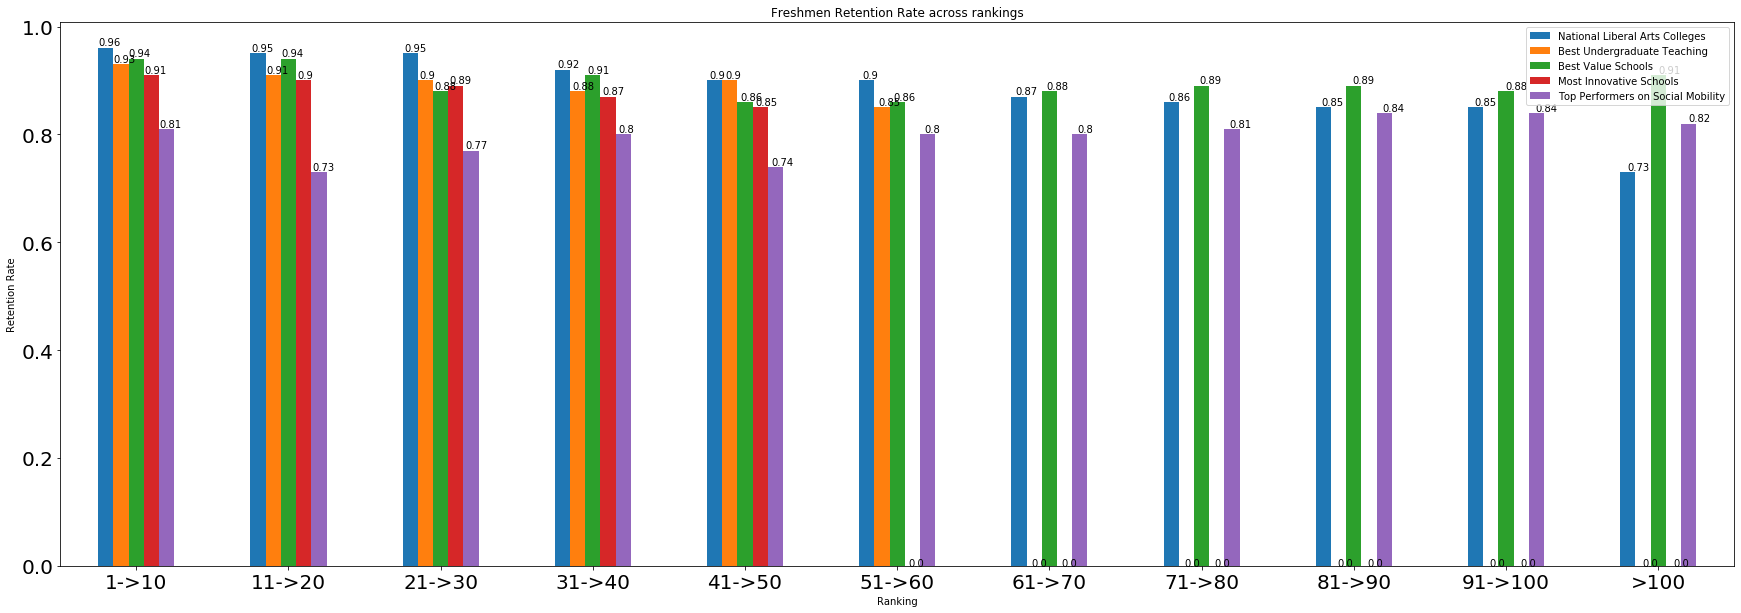

In [14]:
usnews = freshmen_retention_across_rankings(dataset)

**Task 2**

Scatter plot raw data of ranking and endowment per capita

Line plot average of predicted ranking of groups of 10, which is grouped by actual ranking, vs. average endowment per capita of 
schools in each group

In [147]:
def ranking_and_endowment(dataset):
    model = pd.read_csv("model_predicted_modified.csv")
    
    usnews = dataset[["Name", "Ranking", "Total Enrollment", "2018 Endowment"]]
    usnews = usnews.dropna()
#     usnews.info()
    usnews["2018 Endowment"] = usnews["2018 Endowment"].apply(format_endowment)
    usnews['endowment_per_capita'] = usnews["2018 Endowment"]/usnews["Total Enrollment"]
    label = ["Williams College", "Pomona College", "Claremont McKenna College", "Middlebury College", "Bates College", \
             "Bard College", "Berea College", "Skidmore College", "Linfield College", "Bennington College", \
             "Haveford College"]
    
    # -------------- prepare data for predicted line-plot --------------
    model_ranking = []
    model_endowment = []
    for i in range(1,101,10):
        endowment = []
        model_ranking.append(round(model[(model["Actual Ranking"] >= i) & (model["Actual Ranking"] <= i+9)] \
                             ['Model predicted ranking'].mean()))
        for i in model[(model["Actual Ranking"] >= i) & (model["Actual Ranking"] <= i+9)]['Name'].tolist():
            endowment.append(usnews[usnews["Name"] == i]["endowment_per_capita"].tolist()[0])
        model_endowment.append(np.array(endowment).mean())

    endowment = []
    model_ranking.append(round(model[(model["Actual Ranking"] >= 101)]['Model predicted ranking'].mean()))
    for i in model[(model["Actual Ranking"] >= 101)]['Name'].tolist():
        endowment.append(usnews[usnews["Name"] == i]["endowment_per_capita"].tolist()[0])
    model_endowment.append(np.array(endowment).mean())

    print("average predicted ranking")
    print(model_ranking)
    print()
    print("average predicted endowment per capita")
    print(model_endowment)
    
    # ---------------- plot ---------------------
    plt.figure(figsize = (20,10))
    plt.scatter(usnews['Ranking'], usnews['endowment_per_capita'], label = "Actual")
    for college in label:
        plt.text(usnews[usnews["Name"] == college]["Ranking"], \
                 usnews[usnews["Name"] == college]["endowment_per_capita"],college.split(" ")[0], fontsize = 15)
    for college in label:
        plt.scatter(usnews[usnews["Name"] == college]["Ranking"], \
                 usnews[usnews["Name"] == college]["endowment_per_capita"], c = 'r')
    plt.plot(model_ranking, model_endowment, c ='g', linewidth = 2, label = "Predicted")
    plt.xlabel("Ranking", fontsize = 20)
    plt.ylabel("Endowment per capita", fontsize = 20)
    plt.title("Ranking vs. Endowment per capita", fontsize = 20)
    plt.legend(fontsize = 20)
    plt.xticks([i for i in range(1,215,10)])
    plt.savefig("ranking-endowment.png", format = "png")
    print("Saved")
    plt.show()

average predicted ranking
[-7.0, 10.0, 16.0, 32.0, 37.0, 46.0, 63.0, 59.0, 68.0, 69.0, 109.0]

average predicted endowment per capita
[912409.55105073, 483523.50255177723, 585337.8305787633, 209940.4162771548, 311682.28880927816, 201031.7437393353, 125723.64322587778, 180325.3141344484, 103531.88670605826, 186906.934379829, 70548.97106543178]
Saved


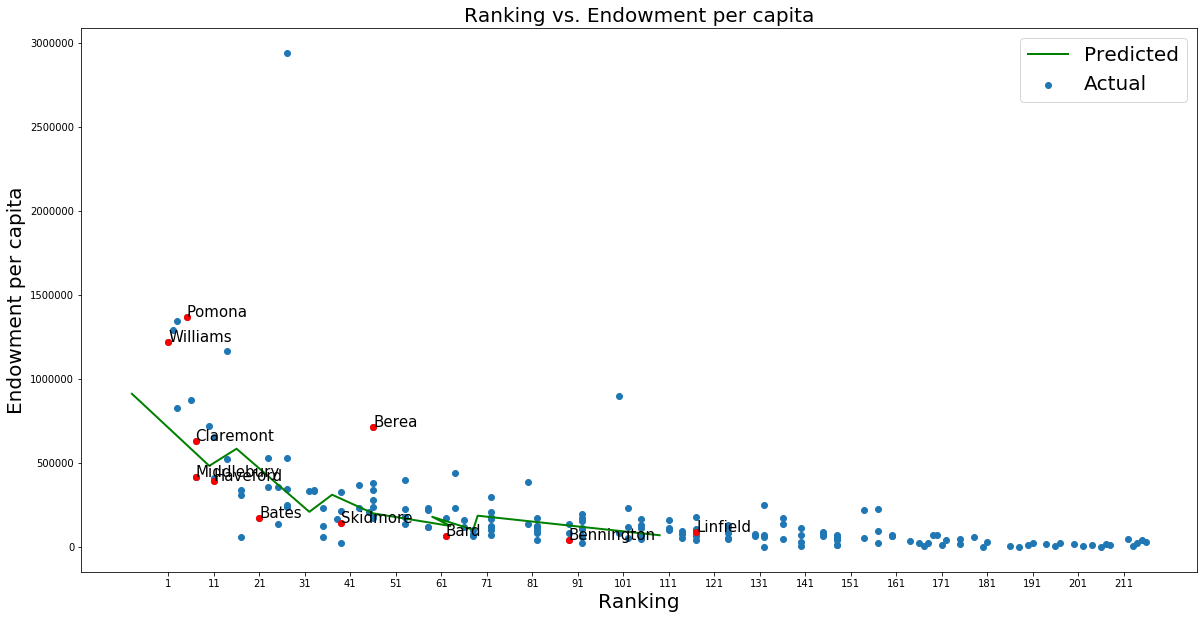

In [148]:
ranking_and_endowment(dataset)